# Question 1 

## Exploring the behaviour of distance metrics in high dimentional spaces

In [91]:
# Function to generate random points from a standard normal distribution

import numpy as np

def random_points(num_points, num_dimensions):
    points = np.random.randn(num_points, num_dimensions)
    return points

In [92]:
# Function to calculate the average distance of selected point to all other points

import numpy as np

def average_distance_sp(points, selected_point):

    # Calculate the differences between the selected point and each point
    differences = points - selected_point

    # Calculate the Euclidean distances
    distances = np.sqrt(np.sum(differences**2, axis=1))

    # Calculate the average distance
    average_distance = np.mean(distances)
    return average_distance

In [93]:
# Function that calculates the minimum distance of selected point to all other points

import numpy as np

def minimum_distance_sp(points, selected_point):

    # Calculate the differences between the selected point and each point
    differences = points - selected_point

    # Calculate the Euclidean distances
    distances = np.sqrt(np.sum(differences**2, axis=1))

    # Find the minimum distance (ignoring the zero distance to itself if present)
    min_distance = np.min(distances[distances != 0]) if selected_point in points else np.min(distances)
    return min_distance


In [94]:
# Function to calculate the ratio of closest distance to average distance

def closest_to_average_ratio(min_dist, avg_dist):
    ratio = min_dist / avg_dist
    return ratio

In [95]:
# Perform the steps for dimensions d = 1, 2, ..., 100
results = []
for d in range(1, 101):
    # Step 1: Generate 1000 d-dimensional data points
    Sd = random_points(1000, d)

    avg_dists = []
    min_dists = []
    ratios = []
    for _ in range(100):
        # Step 2: Select a random point and calculate distances and ratios
        selected_point = Sd[np.random.randint(0, 1000)]
        avg_dist = average_distance_sp(Sd, selected_point)
        min_dist = minimum_distance_sp(Sd, selected_point)
        ratio = closest_to_average_ratio(min_dist, avg_dist)

        # Store individual metrics
        avg_dists.append(avg_dist)
        min_dists.append(min_dist)
        ratios.append(ratio)

    # Step 3: Aggregate the results
    mean_avg_dist = np.mean(avg_dists)
    std_avg_dist = np.std(avg_dists)
    mean_min_dist = np.mean(min_dists)
    std_min_dist = np.std(min_dists)
    mean_ratio = np.mean(ratios)
    std_ratio = np.std(ratios)

    # Store aggregated metrics for the dimension
    results.append((d, mean_avg_dist, std_avg_dist, mean_min_dist, std_min_dist, mean_ratio, std_ratio))


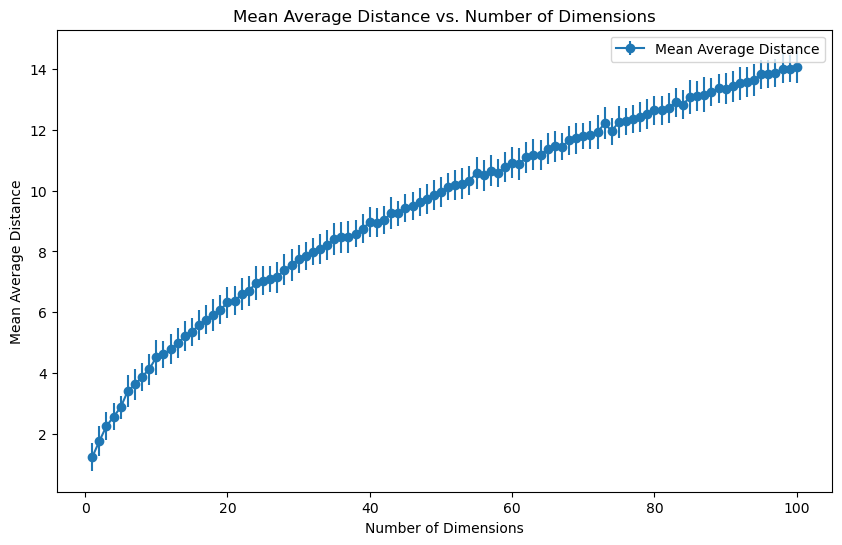

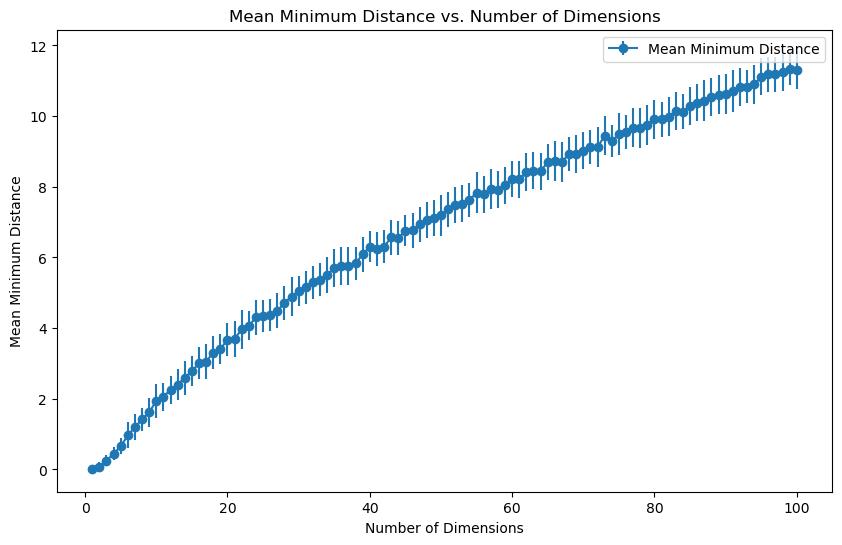

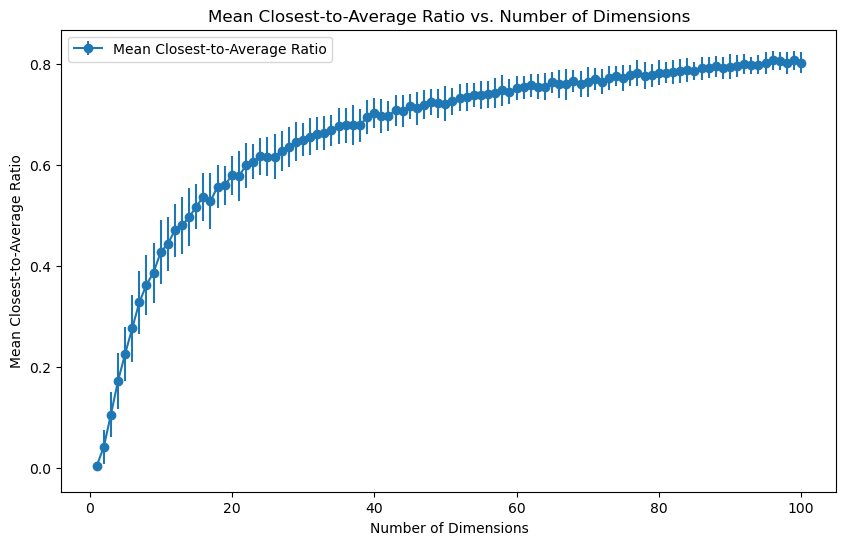

In [96]:
import matplotlib.pyplot as plt

# Assuming 'results' is a list of tuples with (dimension, mean_avg_dist, std_avg_dist, mean_min_dist, std_min_dist, mean_ratio, std_ratio)
# You need to modify the loop where results are calculated to store these values.

# Unpack the results
dimensions, mean_avg_dists, std_avg_dists, mean_min_dists, std_min_dists, mean_ratios, std_ratios = zip(*results)

# Plot mean average distance
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, mean_avg_dists, yerr=std_avg_dists, label='Mean Average Distance', fmt='-o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Average Distance')
plt.title('Mean Average Distance vs. Number of Dimensions')
plt.legend()
plt.show()

# Plot mean minimum distance
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, mean_min_dists, yerr=std_min_dists, label='Mean Minimum Distance', fmt='-o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Minimum Distance')
plt.title('Mean Minimum Distance vs. Number of Dimensions')
plt.legend()
plt.show()

# Plot mean closest-to-average ratio
plt.figure(figsize=(10, 6))
plt.errorbar(dimensions, mean_ratios, yerr=std_ratios, label='Mean Closest-to-Average Ratio', fmt='-o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Closest-to-Average Ratio')
plt.title('Mean Closest-to-Average Ratio vs. Number of Dimensions')
plt.legend()
plt.show()


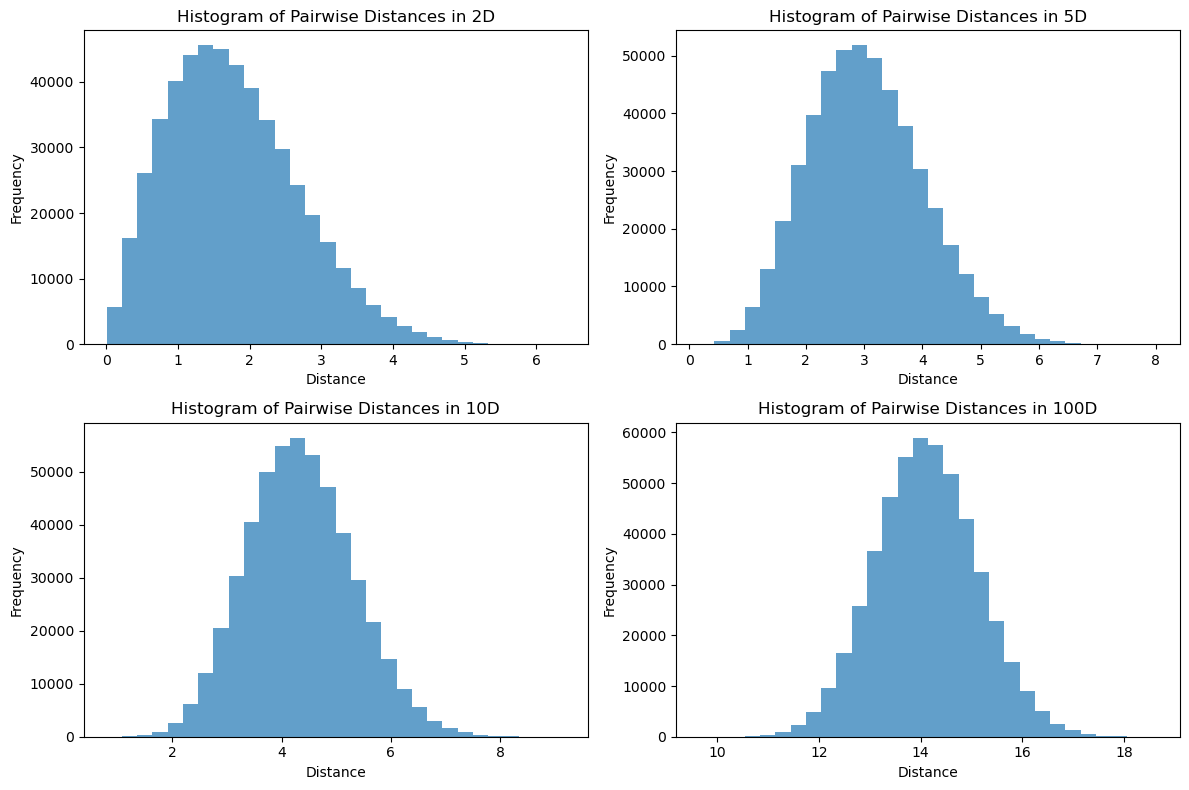

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

def plot_pairwise_distances_histogram(dimensions, num_points=1000):
    plt.figure(figsize=(12, 8))

    for i, d in enumerate(dimensions):
        # Generate the points
        points = random_points(num_points, d)

        # Calculate pairwise distances
        pairwise_dists = pdist(points)

        # Plot histogram
        plt.subplot(2, 2, i + 1)
        plt.hist(pairwise_dists, bins=30, alpha=0.7)
        plt.title(f'Histogram of Pairwise Distances in {d}D')
        plt.xlabel('Distance')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms for dimensions 2, 5, 10, 100
plot_pairwise_distances_histogram([2, 5, 10, 100])


### Increase in the peak of the distance distribution: As the number of dimensions increases, the peak of the histogram shifts to the right, indicating an increase in the average pairwise distance between points. This is a manifestation of the so-called "curse of dimensionality", where the volume of the space increases exponentially, and points that seemed close in lower dimensions can become quite far apart in higher dimensions.
### Narrowing of the distribution: For higher dimensions, the histograms become narrower and taller. This suggests that the distances between pairs of points become more consistent, or there's less variance in the distances as the number of dimensions increases. In high-dimensional spaces, it's common for points to be at roughly the same distance from each other, which is another aspect of the curse of dimensionality.
### 2D and 5D distributions: In lower dimensions, such as 2D and 5D, the histograms are relatively flat and spread out, indicating a wide variation in distances between points. This is expected because in lower-dimensional spaces, the distances can vary more widely from the minimum possible (close to zero) to the maximum possible (determined by the range of the normal distribution from which the points are sampled).
### Concentration of distances in higher dimensions: In the histogram for 100D, there's a clear concentration of distances around a certain value, with very little spread compared to lower dimensions. This indicates that in a 100-dimensional space, almost all pairs of points tend to be at a similar distance from each other.
### Shift towards greater distances: As the dimensionality increases from 2D to 100D, not only does the peak distance increase, but the entire distribution shifts to the right. This demonstrates that with more dimensions, not only does the average distance increase, but all points are also generally farther away from each other than in lower dimensions.

# Question 2

## k-NN classifier

In [98]:
# Installing the libraries

!pip install tensorflow
!pip install scikit-learn


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b325c163d730562bb6deb1ace5acbed0306f5fbefb90e/flatbuffers-24.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e

In [101]:
# Classifying the dataset

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Shuffle and split the training data into development and validation sets (80/20)
train_images, train_labels = shuffle(train_images, train_labels, random_state=42) # Ensure reproducibility

# Split the training data
dev_images, val_images, dev_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [102]:
# Flatten the 3D arrays of images into 2D arrays

dev_images_flattened = dev_images.reshape(dev_images.shape[0], -1)
val_images_flattened = val_images.reshape(val_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

Accuracy for k=1: 84.66%
Accuracy for k=3: 85.27%
Accuracy for k=7: 85.35%
Accuracy for k=12: 85.19%
Accuracy for k=20: 84.53%
Accuracy for k=30: 83.81%
Accuracy for k=50: 82.72%
Accuracy for k=75: 82.04%
Accuracy for k=100: 81.45%
Optimal value of k: 7


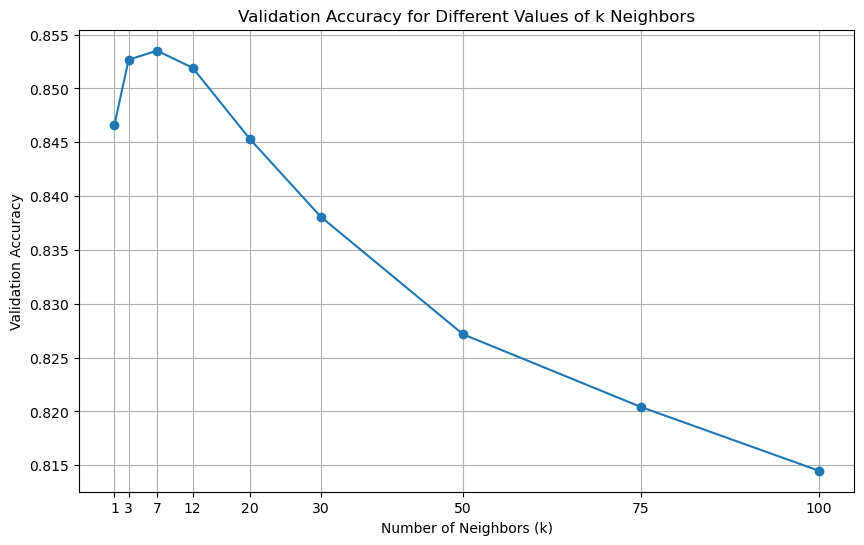

In [103]:
# Building the k-NN classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dev_images_flattened, val_images_flattened, dev_labels, val_labels are already defined and flattened

# List of k values to try
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]

# Store the validation accuracies for each k value
validation_accuracies = []

# Loop over each k value to train and evaluate the k-NN classifier
for k in k_values:
    # Initialize the k-NN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the development set
    knn.fit(dev_images_flattened, dev_labels)
    
    # Predict the labels on the validation set
    val_predictions = knn.predict(val_images_flattened)
    
    # Calculate the accuracy on the validation set
    accuracy = accuracy_score(val_labels, val_predictions)
    validation_accuracies.append(accuracy)
    
    # Print the accuracy for the current k value
    print(f'Accuracy for k={k}: {accuracy*100:.2f}%')

# Find the k value with the highest validation accuracy
optimal_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f'Optimal value of k: {optimal_k}')

# Plot the validation accuracies for different values of k neighbors
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Values of k Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [104]:
# Combine the development and validation sets to form the full training set
full_train_images = np.vstack((dev_images_flattened, val_images_flattened))
full_train_labels = np.hstack((dev_labels, val_labels))

# Initialize the k-NN classifier with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Retrain the classifier on the full training set
knn.fit(full_train_images, full_train_labels)

# Predict the labels on the test set
test_predictions = knn.predict(test_images_flattened)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)

# Print out the test accuracy
print(f'Test accuracy for k={optimal_k}: {test_accuracy*100:.2f}%')


Test accuracy for k=7: 85.40%


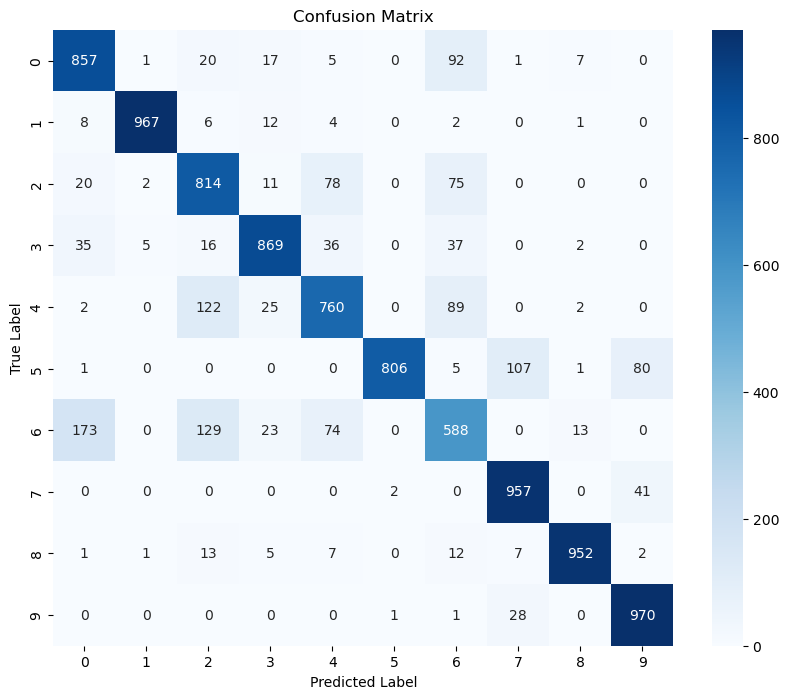

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### The diagonal cells represent correct classifications. High values on the diagonal indicate a high number of correct predictions for the corresponding class.
### Classes with the highest number of correct classifications can be seen by the darker cells along the diagonal. For instance, classes 1, 7, and 9 have particularly high values, suggesting that the classifier performs well on these classes.
### Misclassifications are indicated by the off-diagonal cells. A quick glance shows that class 6 has a notable number of misclassifications. It has been frequently misclassified as class 0, which indicates a pattern of confusion between these two classes.
### Specific pairs of classes that are commonly mistaken for one another can be seen in the cells that have higher values off the diagonal. For instance:
#### * Class 0 (perhaps 'T-shirt/top') is often confused with Class 6 (perhaps 'Shirt'), indicated by the cell (0,6) having a high value.
#### * Class 2 (perhaps 'Pullover') is frequently mistaken for Class 4 (perhaps 'Coat'), and vice versa, as indicated by significant values in cells (2,4) and (4,2).
#### * Class 4 is also commonly confused with Class 6, as can be seen by the value in cell (4,6).
#### * Another noticeable confusion is between Class 3 (perhaps 'Dress') and Class 6, as seen in cell (3,6).